# Analyse de données : Les indicateurs

On cherche à "résumer" nos données. Pour ça, on a besoin d'utiliser des indicateurs statistiques.

On a ici deux listes, qui correspondent à la taille de **basketteuses et basketteurs** de l'equipe professionnel des LA Lakers, en cm:

In [2]:
hommes = [208, 203, 239, 196, 196, 208, 208, 198, 211, 201, 193, 206, 203, 193, 201, 191, 203, 185]

femmes = [178, 173, 175, 188, 196, 193, 196, 183, 188, 193, 206]



On peut utiliser ses données, pour les insérer dans un DataFrame

In [4]:
import pandas as pd
homme_df = pd.DataFrame(hommes)
homme_df.columns=['taille']
homme_df

,taille
0,208
1,203
2,239
3,196
4,196
5,208
6,208
7,198
8,211
9,201


In [5]:
femme_df = pd.DataFrame(femmes)
femme_df.columns=['taille']
femme_df

,taille
0,178
1,173
2,175
3,188
4,196
5,193
6,196
7,183
8,188
9,193


Résumer les données de manière efficace

In [6]:
homme_df['sex'] = 'homme'
femme_df['sex'] = 'femme'

basket_df = pd.concat([homme_df, femme_df], ignore_index=True)

In [7]:
basket_df

,taille,sex
0,208,homme
1,203,homme
2,239,homme
3,196,homme
4,196,homme
5,208,homme
6,208,homme
7,198,homme
8,211,homme
9,201,homme


# `.describe()`

In [8]:
basket_df.describe()

,taille
count,29.000000
mean,196.965517
std,12.890979
min,173.000000
25%,191.000000
50%,196.000000
75%,203.000000
max,239.000000


On a ici quelques indicateurs:
* La moyenne
* l'écart type
* l'étendue (la valeur min et max)
* les quartiles

# `Le mode`
Il s'agit de la valeur qui est la plus représenté

In [18]:
import numpy as np
basket_df['taille'].value_counts()

196    4
193    4
208    3
203    3
201    2
206    2
188    2
239    1
198    1
211    1
191    1
185    1
178    1
173    1
175    1
183    1
Name: taille, dtype: int64

Il y a 2 modes (193 et 196) car ces deux valeurs sont représentés plus que les autres valeurs.

In [9]:
import statistics
statistics.mode(basket_df['taille'])

196

## Une valeur extrême influence elle plus la moyenne ou la médiane ?

In [20]:
#mean
basket_df['taille'].mean()

196.9655172413793

In [21]:
#median
basket_df['taille'].median()

196.0

In [ ]:
# ajouter nouvelle valeur extrême

basket_df = basket_df.append({"taille": 130, "sex": "homme"}, ignore_index=True)

In [11]:
# reprint mean et median

basket_df['taille'].mean()

194.73333333333332

In [12]:
basket_df['taille'].median()

196.0

On voit bien que c'est la moyenne qui est impacté par une valeur extrême.

**Une application directe : les salaires en France**

En France, le salaire mensuel moyen en équivalent temps plein (EQTP) d'une personne travaillant dans le secteur privé ou dans une entreprise publique est de 2 238 euros (étude de 2016).

Mais 70% de la population gagne moins que ce montant !

Explication : Il y a beaucoup de personnes avec un "petit" salaire, mais légalement, personne ne peut avoir un salaire inférieur au SMIC, et encore moins un salaire négatif. En revanche, quelques personnes avec un salaire très élevé de plusieurs millions d'euros suffisent à augmenter la moyenne.

La médiane des salaires mensuels moyens s'élève à 1789 euros. 50% des salariés gagnent moins, et 50% gagnent plus. Quel que soit le montant des très gros salaires.

Source : [INSEE](https://www.insee.fr/fr/statistiques/4277680)

## Quelles informations en plus peuvent bien apporter les indicateurs de dispersion ? 

### `L'étendue`

In [ ]:
basket_df.describe()

,taille
count,30.000000
mean,194.733333
std,17.604728
min,130.000000
25%,188.750000
50%,196.000000
75%,203.000000
max,239.000000


In [14]:
# étendue

basket_df['taille'].max() -basket_df['taille'].min()

109

L'étendue statistique est de 109 cm. Cela signifie qu'il y a plus de 1 mètres d'écart entre la valeur la plus grande et la valeur la plus petite.

### `La variance`

In [ ]:
basket_df

,taille,sex
0,208,homme
1,203,homme
2,239,homme
3,196,homme
4,196,homme
5,208,homme
6,208,homme
7,198,homme
8,211,homme
9,201,homme


# Variance Population

$$var =\frac{\sum (x_{i} - \bar{x})^{2}}{N}$$

In [15]:
# variance

(basket_df["taille"] - basket_df["taille"].mean())

0     13.266667
1      8.266667
2     44.266667
3      1.266667
4      1.266667
5     13.266667
6     13.266667
7      3.266667
8     16.266667
9      6.266667
10    -1.733333
11    11.266667
12     8.266667
13    -1.733333
14     6.266667
15    -3.733333
16     8.266667
17    -9.733333
18   -16.733333
19   -21.733333
20   -19.733333
21    -6.733333
22     1.266667
23    -1.733333
24     1.266667
25   -11.733333
26    -6.733333
27    -1.733333
28    11.266667
29   -64.733333
Name: taille, dtype: float64

In [26]:
# Calculons la variance manuellement:
# 1 - Pour chaque valeur, on calcule l'écart à la moyenne:

(basket_df["taille"] - basket_df["taille"].mean())

0     13.266667
1      8.266667
2     44.266667
3      1.266667
4      1.266667
5     13.266667
6     13.266667
7      3.266667
8     16.266667
9      6.266667
10    -1.733333
11    11.266667
12     8.266667
13    -1.733333
14     6.266667
15    -3.733333
16     8.266667
17    -9.733333
18   -16.733333
19   -21.733333
20   -19.733333
21    -6.733333
22     1.266667
23    -1.733333
24     1.266667
25   -11.733333
26    -6.733333
27    -1.733333
28    11.266667
29   -64.733333
Name: taille, dtype: float64

In [16]:
# 2 - On élève chaque valeur au carré.

(basket_df["taille"] - basket_df["taille"].mean()) ** 2

0      176.004444
1       68.337778
2     1959.537778
3        1.604444
4        1.604444
5      176.004444
6      176.004444
7       10.671111
8      264.604444
9       39.271111
10       3.004444
11     126.937778
12      68.337778
13       3.004444
14      39.271111
15      13.937778
16      68.337778
17      94.737778
18     280.004444
19     472.337778
20     389.404444
21      45.337778
22       1.604444
23       3.004444
24       1.604444
25     137.671111
26      45.337778
27       3.004444
28     126.937778
29    4190.404444
Name: taille, dtype: float64

In [17]:
# 3 - On fait la somme de tout ces écarts à la moyene, élevé au carré

sum((basket_df["taille"] - basket_df["taille"].mean()) ** 2)

8987.866666666667

In [36]:
# 4 - On divise cette somme par le nombre total d'individus

sum((basket_df["taille"] - basket_df["taille"].mean()) ** 2) / (len(basket_df) - 1)

309.9264367816092

In [35]:
basket_df["taille"].var()

309.92643678160914

En savoir plus sur pourquoi on divise par n-1 : https://www.khanacademy.org/math/ap-statistics/summarizing-quantitative-data-ap/more-standard-deviation/v/review-and-intuition-why-we-divide-by-n-1-for-the-unbiased-sample-variance

In [18]:
basket_df.describe()

,taille
count,30.000000
mean,194.733333
std,17.604728
min,130.000000
25%,188.750000
50%,196.000000
75%,203.000000
max,239.000000


### `L' écart type`

In [26]:
# L'écart type, c'est simplement la racine carré de la variance

basket_df["taille"].var() ** 0.5

17.604727682688225

In [20]:
2**5

32

In [25]:
2**2 **0.5

2.665144142690225

### Les quantiles

In [ ]:
basket_df.describe()

,taille
count,30.000000
mean,194.733333
std,17.604728
min,130.000000
25%,188.750000
50%,196.000000
75%,203.000000
max,239.000000


25 % des valeurs les plus basses sont en dessous de 188.75 cm.  
50 % des valeurs les plus basses sont en dessous de 196 cm.

0.26666666666666666

In [ ]:

len(basket_df[basket_df["taille"] <= 188.75]) / len(basket_df)

8

#### 1er Quartile

In [30]:
len(basket_df[basket_df["taille"] <= 188.75]) / len(basket_df)

0.26666666666666666

On trouve 26% et non 25%, car 188.75 est la valeur la plus prochede 25%.

#### 2ème Quartile

In [ ]:
basket_df[basket_df["sex"] == "femme"]

,taille,sex
18,178,femme
19,173,femme
20,175,femme
21,188,femme
22,196,femme
23,193,femme
24,196,femme
25,183,femme
26,188,femme
27,193,femme


In [31]:
len(basket_df[basket_df["taille"] <= 196]) / len(basket_df)

0.5666666666666667

Encore une fois, on ne trouve pas 50%. 195 est la valeur la plus proche de 50%. Cette "imprécision" est lié à la taille du dataset.

In [32]:
len(basket_df[basket_df["taille"] <= 203]) / len(basket_df)

0.7666666666666667

#### .boxplot() (retourner à la prez)

On peut aussi utiliser des graphiques pour visualiser nos données.  
La visualisation de données est souvent plus efficace qu'un tableau de nombre, pour une bonne interprétation.

In [ ]:
basket_df.describe()

,taille
count,30.000000
mean,194.733333
std,17.604728
min,130.000000
25%,188.750000
50%,196.000000
75%,203.000000
max,239.000000


<AxesSubplot:>

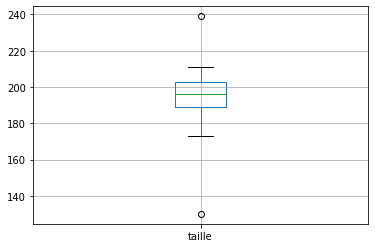

In [33]:
basket_df.boxplot()

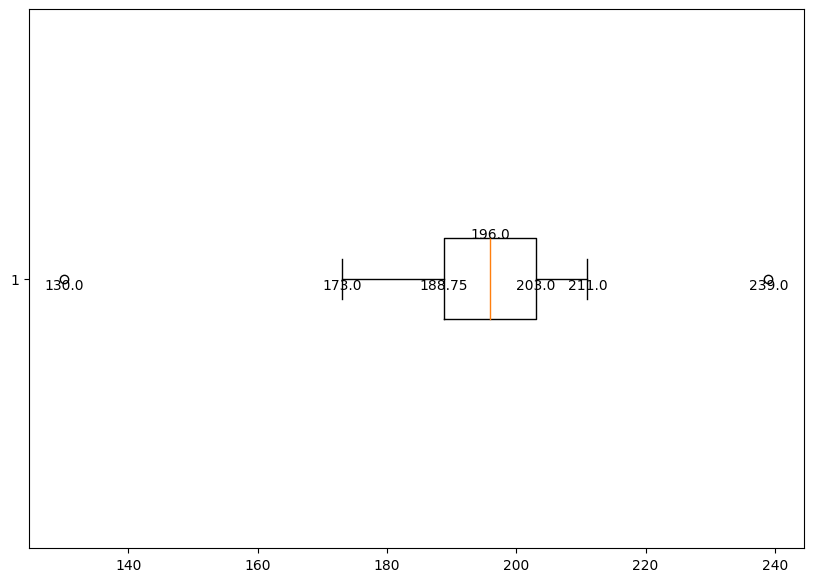

In [34]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,7))

boxplot = plt.boxplot(basket_df['taille'], vert=False)

for line in boxplot['medians']:
    # get position data for median line
    x, y = line.get_xydata()[1] # top of median line
    # overlay median value
    plt.text(x, y, x,
         horizontalalignment='center') # draw above, centered

for line in boxplot['whiskers']:
    x, y = line.get_xydata()[0] # bottom of left line
    plt.text(x,y, x,
         horizontalalignment='center', # centered
         verticalalignment='top')      # below
    x, y = line.get_xydata()[1] # bottom of right line
    plt.text(x,y, x,
         horizontalalignment='center', # centered
             verticalalignment='top')      # below

for line in boxplot['fliers']:
    x, y = line.get_xydata()[0] # bottom of left line
    plt.text(x,y, x,
         horizontalalignment='center', # centered
         verticalalignment='top')      # below
    x, y = line.get_xydata()[1] # bottom of right line
    plt.text(x,y, x,
         horizontalalignment='center', # centered
             verticalalignment='top')      # below


plt.show()

En observant cette "boîte à moustache", on retrouve bien les informations retournés par .describe(), en ce qui concerne les quartiles (Q1:25%, Q2:50% et Q3:75%) qui sont représentés par le rectangle bleu.  



On observe également deux outliers.

On observe la distribution des tailles. On constate une distribution normale.  
Il y a environ autant d'individus au dessus qu'en dessous la moyenne.

<AxesSubplot:ylabel='Density'>

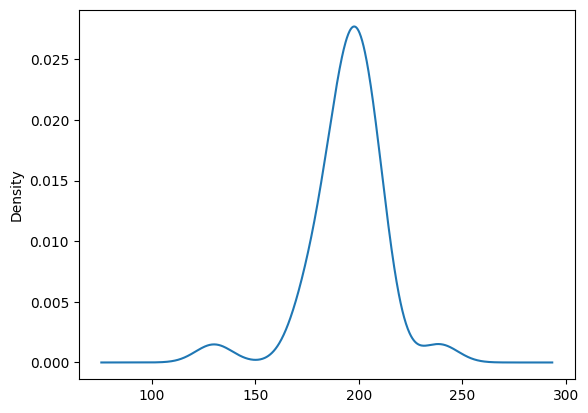

In [36]:
basket_df['taille'].plot.density()

<AxesSubplot:ylabel='Density'>

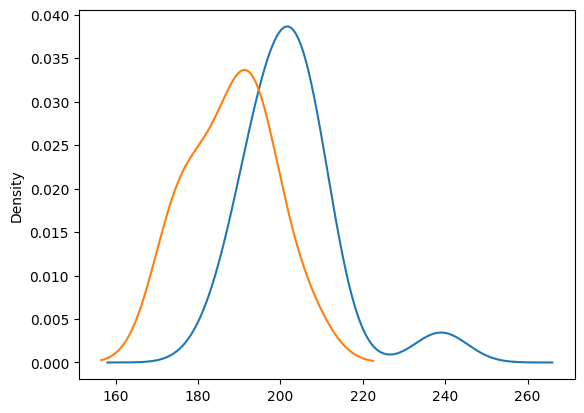

In [37]:
homme_df['taille'].plot.density()
femme_df['taille'].plot.density()

### Rappel Vocabulaire statistique

- **Population** : l'ensemble des valeurs réelles.

- **Echantillon (Sample)** : lorsque le nombre de valeurs est trop grand, nous travaillons par échantillonnage. Un échantillon est donc une sous-partie de la population.

- **Individu (ou observation)** : niveau unitaire, il s'agit d'une seule valeur (par convention, c'est une ligne).

- **Variable** : c'est une mesure pour une sémantique précise. Par exemple la taille, l'âge, le nombre de kilomètres.Par convention, c'est une colonne. A ne pas confondre avec une variable au sens Python.